In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
df_b7_init = pd.read_csv('/Users/shreyabanerjee/DA_proj/clean_csvs/44009_clean.csv')
df_b8_init = pd.read_csv('/Users/shreyabanerjee/DA_proj/clean_csvs/44065_clean.csv')

In [3]:
def plot_df(df, x,y1, y2, title="", xlabel='Date', dpi=100):
    
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1)
    ax1.set_ylabel('Windspeed')
    #plt.setp(fig, rotation=90)
    plt.xticks(rotation=90)
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r-')
    ax2.set_ylabel('Pressure', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

In [4]:

keep_col = ['day','month','datetime','waveperiod','waveheight','WindDir','windspeed','pressure','possibility','hurrthreat']
df_b7 = df_b7_init[keep_col]
df_b8=df_b8_init[keep_col]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



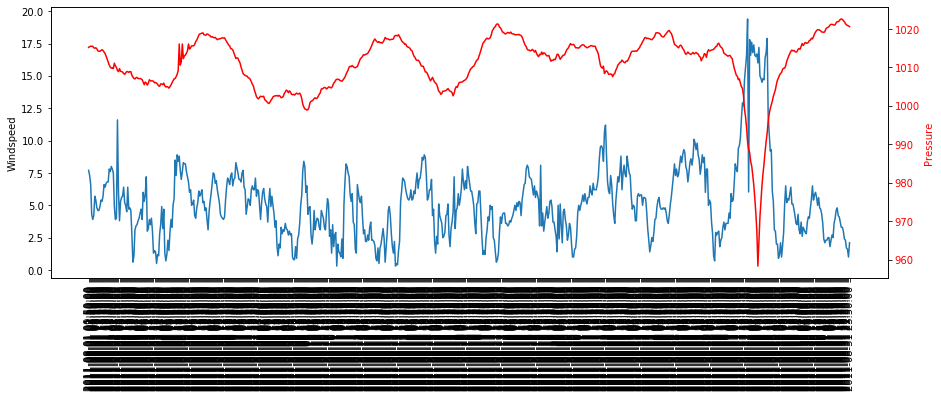

In [5]:
rs_09 = df_b7.loc[ (df_b7['month']==8)] #& ( (df_b7['day']==27) | (df_b7['day']==28) | (df_b7['day']==29) )]rs_09['date'] = rs_09['datetime'].astype('datetime64[ns]')
rs_09['date'] = rs_09['datetime'].astype('datetime64[ns]')
rs_09.head()
plot_df(rs_09, x=rs_09.datetime,y1=rs_09.windspeed, y2=rs_09.pressure, title='Pressure in month of August')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



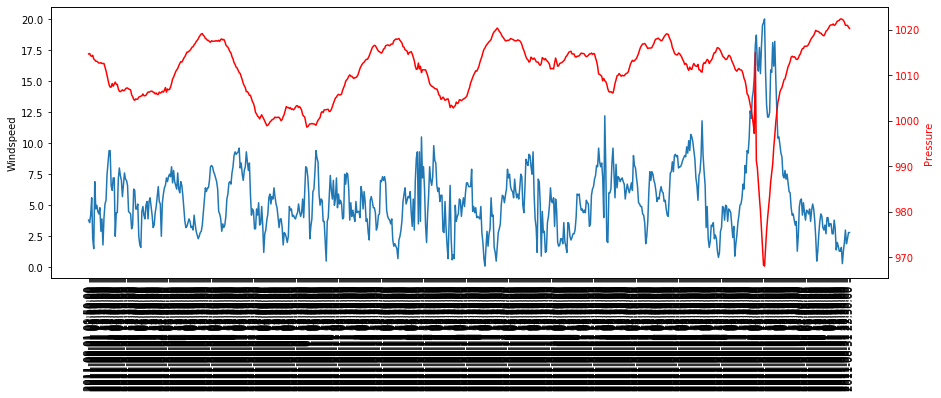

In [6]:
rs_65 = df_b8.loc[ (df_b8['month']==8)]# & ( (df_b8['day']==27) | (df_b8['day']==28) | (df_b8['day']==29) )]
rs_65['date'] = rs_65['datetime'].astype('datetime64[ns]')
rs_65.head()
plot_df(rs_65, x=rs_65.datetime,y1=rs_65.windspeed, y2=rs_65.pressure, title='Pressure in month of August')

Text(0, 0.5, 'pressure')

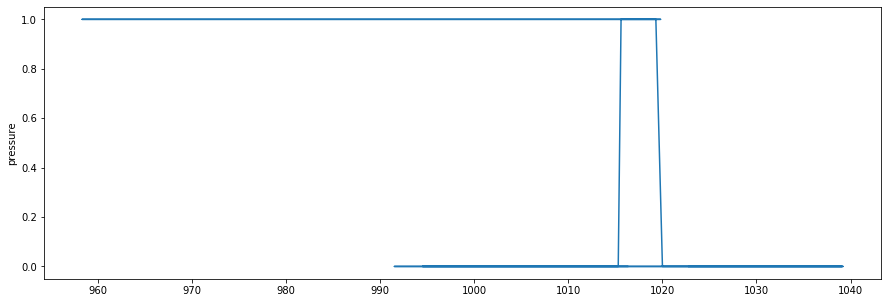

In [80]:
x=df_b7['pressure']
y1=df_b7['hurrthreat']
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('pressure')

In [81]:
keep_col = ['day','month','waveperiod','waveheight','WindDir','windspeed','pressure']
X = df_b7_init[keep_col]
y = df_b7_init['hurrthreat']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['hurrthreat'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['hurrthreat']==0]))
print("Number of subscription",len(os_data_y[os_data_y['hurrthreat']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['hurrthreat']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['hurrthreat']==1])/len(os_data_X))

length of oversampled data is  11848
Number of no subscription in oversampled data 5924
Number of subscription 5924
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [85]:
os_data_X


,day,month,waveperiod,waveheight,WindDir,windspeed,pressure
0,16.000000,11.0,4.330000,0.930000,200.000000,6.800000,1013.000000
1,17.000000,12.0,3.780000,1.100000,319.000000,8.900000,1021.300000
2,7.000000,10.0,6.090000,0.890000,29.000000,3.700000,1031.700000
3,23.000000,10.0,3.750000,0.500000,360.000000,3.700000,1022.900000
4,23.000000,5.0,4.090000,1.050000,138.000000,6.100000,1018.500000
...,...,...,...,...,...,...,...
11843,26.409705,8.0,4.956781,0.947647,51.487101,3.153563,1018.569042
11844,23.000000,8.0,3.901889,0.763524,34.704889,4.010622,1017.670489
11845,24.000000,8.0,4.133792,0.498253,142.747198,3.982528,1018.877696
11846,30.000000,8.0,6.293113,1.050437,28.620203,4.762846,1016.735794


In [47]:
os_data_y.head()

,hurrthreat
0,0
1,0
2,0
3,0
4,0


In [86]:
keep_col = ['windspeed','pressure']
df_b7_logit = os_data_X[keep_col]
y1=os_data_y['hurrthreat']


In [87]:
X_train, x_test, y_train, y_test = train_test_split(df_b7_logit,y1,test_size=0.3, random_state=0)

In [88]:
logreg = LogisticRegression()

#logit_model=sm.Logit(y_train,X_train.astype(float))

result=logreg.fit(X_train,y_train)
#print(result.summary2())

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [69]:
#keep_col_new=['pressure']
#new_x= df_b7_init[keep_col_new]
#y1=df_b7_init['hurrthreat']
#X_t, X_tes, y_t, y_tes = train_test_split(new_x, y1, test_size=0.3, random_state=0)

#model.fit(X_t, y_t)
y_pred = logreg.predict(x_test)
x_test.head()
#X_tes.iloc[3]
for i in range(len(x_test)):
    if(x_test.iloc[i]['pressure']<1000):
        print("%s, Predicted=%s" % (x_test.iloc[i], y_pred[i]))

windspeed      1.4
pressure     997.9
Name: 1569, dtype: float64, Predicted=0
windspeed      8.777317
pressure     999.423912
Name: 8544, dtype: float64, Predicted=1
windspeed     17.270665
pressure     980.386182
Name: 7465, dtype: float64, Predicted=1
windspeed     16.553771
pressure     970.809489
Name: 7302, dtype: float64, Predicted=1
windspeed     19.079875
pressure     991.171034
Name: 7712, dtype: float64, Predicted=1
windspeed      6.125145
pressure     989.749682
Name: 10901, dtype: float64, Predicted=1
windspeed     11.024748
pressure     998.015319
Name: 10777, dtype: float64, Predicted=1
windspeed     16.923587
pressure     983.032648
Name: 9175, dtype: float64, Predicted=1
windspeed     11.184533
pressure     996.874460
Name: 6719, dtype: float64, Predicted=1
windspeed     17.358687
pressure     978.777360
Name: 6098, dtype: float64, Predicted=1
windspeed      9.031949
pressure     999.402999
Name: 11334, dtype: float64, Predicted=1
windspeed     16.792093
pressure     97

Name: 7146, dtype: float64, Predicted=1
windspeed     16.095574
pressure     959.528807
Name: 9718, dtype: float64, Predicted=1
windspeed      7.278555
pressure     989.362040
Name: 6841, dtype: float64, Predicted=1
windspeed     14.924179
pressure     972.358629
Name: 8860, dtype: float64, Predicted=1
windspeed     11.308673
pressure     987.101736
Name: 11438, dtype: float64, Predicted=1
windspeed      9.911158
pressure     997.783100
Name: 6520, dtype: float64, Predicted=1
windspeed     16.479372
pressure     971.530680
Name: 11768, dtype: float64, Predicted=1
windspeed     18.639183
pressure     991.605365
Name: 9105, dtype: float64, Predicted=1
windspeed      9.209248
pressure     999.383229
Name: 7645, dtype: float64, Predicted=1
windspeed     15.156278
pressure     992.782048
Name: 11050, dtype: float64, Predicted=1
windspeed     14.720313
pressure     991.048784
Name: 9004, dtype: float64, Predicted=1
windspeed     12.3
pressure     999.0
Name: 665, dtype: float64, Predicted=1


In [91]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


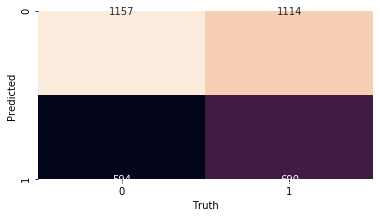

In [98]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [89]:
df_b8_logit = df_b8_init[keep_col]
y2=df_b8_init['hurrthreat']

In [90]:
y_pred2 = logreg.predict(df_b8_logit)
for i in range(len(df_b8_logit)):
    if(df_b8_logit.iloc[i]['pressure']<1000):
        print("%s, Predicted=%s" % (df_b8_logit.iloc[i], y_pred2[i]))

windspeed      2.6
pressure     999.6
Name: 152, dtype: float64, Predicted=0
windspeed      2.5
pressure     999.0
Name: 153, dtype: float64, Predicted=0
windspeed      3.7
pressure     998.6
Name: 154, dtype: float64, Predicted=1
windspeed      4.3
pressure     998.1
Name: 155, dtype: float64, Predicted=1
windspeed      4.9
pressure     997.8
Name: 156, dtype: float64, Predicted=1
windspeed      5.0
pressure     997.3
Name: 157, dtype: float64, Predicted=1
windspeed      5.4
pressure     997.0
Name: 158, dtype: float64, Predicted=1
windspeed      6.7
pressure     996.5
Name: 159, dtype: float64, Predicted=1
windspeed      6.9
pressure     995.7
Name: 160, dtype: float64, Predicted=1
windspeed      7.3
pressure     994.9
Name: 161, dtype: float64, Predicted=1
windspeed      4.4
pressure     994.2
Name: 162, dtype: float64, Predicted=1
windspeed      7.8
pressure     993.7
Name: 163, dtype: float64, Predicted=1
windspeed      5.4
pressure     994.0
Name: 164, dtype: float64, Predicted=1

windspeed      2.7
pressure     999.9
Name: 5256, dtype: float64, Predicted=0
windspeed      3.0
pressure     999.4
Name: 5257, dtype: float64, Predicted=0
windspeed      3.8
pressure     998.9
Name: 5258, dtype: float64, Predicted=1
windspeed      4.3
pressure     999.0
Name: 5259, dtype: float64, Predicted=1
windspeed      5.6
pressure     999.3
Name: 5260, dtype: float64, Predicted=1
windspeed      5.9
pressure     999.7
Name: 5261, dtype: float64, Predicted=1
windspeed      5.1
pressure     999.9
Name: 5262, dtype: float64, Predicted=1
windspeed      8.1
pressure     999.7
Name: 5296, dtype: float64, Predicted=1
windspeed      8.0
pressure     998.6
Name: 5297, dtype: float64, Predicted=1
windspeed      7.3
pressure     998.7
Name: 5298, dtype: float64, Predicted=1
windspeed      5.9
pressure     999.0
Name: 5299, dtype: float64, Predicted=1
windspeed      2.3
pressure     999.3
Name: 5300, dtype: float64, Predicted=0
windspeed      3.3
pressure     999.3
Name: 5301, dtype: float64